In [1]:
import numpy as np
import pandas as pd
import src.main as main
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from src.preprocessing import BrowserMapper, DateEncoder, DeviceMapper
from xgboost.sklearn import XGBClassifier#

pipeline = make_pipeline(
    ColumnTransformer(transformers=[
        (
            "categorical",
            make_pipeline(
                ColumnTransformer(transformers=[
                    (
                        "date_encoder",
                        DateEncoder(),
                        ["date_account_created"]
                    ),
                    (
                        "date_encoder_2",
                        DateEncoder(date_format='%Y%m%d%H%M%S'),
                        ["timestamp_first_active"]
                    ),
                    (
                        "device_mapper",
                        DeviceMapper(),
                        ["first_device_type"]
                    ),
                    (
                        "browser_mapper",
                        BrowserMapper(),
                        ["first_browser"]
                    )
                ], remainder="passthrough"
                ),
                SimpleImputer(strategy="most_frequent"),
                OneHotEncoder(handle_unknown="ignore")
            ),
            [
                "signup_method",
                "gender",
                "language",
                "affiliate_channel",
                "affiliate_provider",
                "first_affiliate_tracked",
                "signup_app",
                "signup_flow",
                "date_account_created",
                "timestamp_first_active",
                "first_device_type",
                "first_browser",
            ]
        ),
        (
            "continuous",
            make_pipeline(
                SimpleImputer(strategy="mean"),
                StandardScaler()
            ), ["age","empty_vals"]
        )
    ]),
    XGBClassifier(
        objective='multi:softprob',
        n_estimators=150,
        verbosity=1,
        max_depth=10
    )
)

main.run_mlflow_pipeline("../data/raw", pipeline, run_test=False)


flow/sklearn/utils.py:504: UserWarning: Logging to MLflow failed: invalid literal for int() with base 10: 'mlruns'"
2021/04/17 16:23:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/harry/miniconda3/envs/airbnb/lib/python3.7/site-packages/mlflow/models/signature.py:123: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2021/04/17 16:23:

In [90]:
import matplotlib.pyplot as plt

width = 417.47307

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [2]:
col_transformers = pipeline['columntransformer'].transformers_
category_step = col_transformers[0]
category_encoder = category_step[1]['onehotencoder']
columns_in = np.append(category_encoder.get_feature_names(), col_transformers[1][2])


In [3]:
pd.Series(index=columns_in, data=pipeline['xgbclassifier'].feature_importances_)

x0_2010       0.004001
x0_2011       0.004441
x0_2012       0.004809
x0_2013       0.002392
x0_2014       0.002705
                ...   
x19_23        0.002092
x19_24        0.002060
x19_25        0.002811
age           0.004998
empty_vals    0.139182
Length: 233, dtype: float32

['date_encoder__date_account_created_year',
 'date_encoder__date_account_created_month',
 'date_encoder__date_account_created_day',
 'date_encoder__date_account_created_dayofweek',
 'date_encoder_2__timestamp_first_active_year',
 'date_encoder_2__timestamp_first_active_month',
 'date_encoder_2__timestamp_first_active_day',
 'date_encoder_2__timestamp_first_active_dayofweek',
 'date_encoder_2__timestamp_first_active_hour',
 'device_mapper__first_device_type_software',
 'device_mapper__first_device_type_hardware',
 'browser_mapper__first_browser',
 'signup_method',
 'gender',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'signup_flow']

[array([2010, 2011, 2012, 2013, 2014], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 array([2009, 2010, 2011, 2012, 2013, 2014], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23], dtype=object),
 array(['Android', 'Apple', 'Other', 'Windows'], dtype=object),
 array(['Desktop', 'Other', 'Phone', 'Tablet'], dtype=object),
 array(['Chrome', 'Firefox', 'IE', 'Other', 'Safari'], dtype=object),
 array(['basic', 'facebook', 'google'], dtype=object),
 array

In [18]:
categorical_features = category_step[1]['columntransformer'].get_feature_names()

In [47]:
tuples = [
        (categorical_features[i], category)
        for i in range(len(categorical_features))
        for category in category_encoder.categories_[i]
    ] + list(zip(col_transformers[1][2], col_transformers[1][2]))


In [48]:
index = pd.MultiIndex.from_tuples(tuples)

In [38]:
feature_importances = pd.Series(index=index, data=pipeline['xgbclassifier'].feature_importances_)

In [68]:
feature_importances.groupby(level=0).sum()

affiliate_channel                                   0.022894
affiliate_provider                                  0.028442
age                                                 0.004998
browser_mapper__first_browser                       0.056187
date_encoder_2__timestamp_first_active_day          0.069789
date_encoder_2__timestamp_first_active_dayofweek    0.017543
date_encoder_2__timestamp_first_active_hour         0.069010
date_encoder_2__timestamp_first_active_month        0.031084
date_encoder_2__timestamp_first_active_year         0.025742
date_encoder__date_account_created_day              0.088354
date_encoder__date_account_created_dayofweek        0.017135
date_encoder__date_account_created_month            0.035812
date_encoder__date_account_created_year             0.018348
device_mapper__first_device_type_hardware           0.013990
device_mapper__first_device_type_software           0.023322
empty_vals                                          0.139182
first_affiliate_tracked 

In [69]:
outer_index = feature_importances.index.get_level_values(0).copy().values

In [70]:
first_level_values = feature_importances.index.get_level_values(0).unique()

In [71]:

for group_col in ["first_browser", "timestamp_first_active", "date_account_created", "first_device_type"]:

    for timestamp_first_active_sub in first_level_values[first_level_values.str.contains(group_col)]: 
        outer_index[outer_index == timestamp_first_active_sub] = group_col

In [73]:
np.unique(outer_index)

array(['affiliate_channel', 'affiliate_provider', 'age',
       'date_account_created', 'empty_vals', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method',
       'timestamp_first_active'], dtype=object)

In [83]:
new_index = pd.MultiIndex.from_tuples([(y, x[0], x[1])for x, y in zip(tuples, outer_index)])

In [85]:
feature_importances = pd.Series(index=new_index, data=pipeline['xgbclassifier'].feature_importances_)

In [93]:
level_0_importances = feature_importances.groupby(level=0).sum()

In [96]:
level_0_importances.index = level_0_importances.index.str.replace("_", "\_")

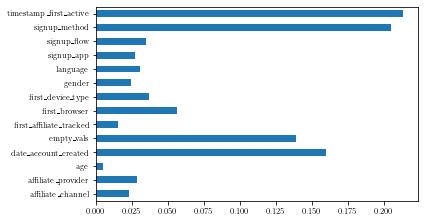

In [101]:
plt = level_0_importances.plot(kind='barh', figsize=set_size(width, fraction=1))
fig = plt.get_figure()
fig.savefig('feature_importances.pdf', format='pdf', bbox_inches='tight')